In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd



from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
# time.sleep(120)

In [3]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

#     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
    commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [ ]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [ ]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [ ]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [ ]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [ ]:
# df

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 2, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 2, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 2, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 2, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 3, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 3, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 3, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 3, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 17, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 18, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 20, 'eu-central-1', 0, 4, 'FKE.pem', -1, 16,
# 21, 'eu-central-1', 0, 4, 'FKE.pem', -1, 17,
# 22, 'eu-central-1', 0, 4, 'FKE.pem', -1, 18,
# 23, 'eu-central-1', 0, 4, 'FKE.pem', -1, 19,
# 24, 'eu-central-1', 0, 5, 'FKE.pem', -1, 20,
# 25, 'eu-central-1', 0, 5, 'FKE.pem', -1, 21,
# 26, 'eu-central-1', 0, 5, 'FKE.pem', -1, 22,
# 27, 'eu-central-1', 0, 5, 'FKE.pem', -1, 23,
# 28, 'eu-central-1', 0, 6, 'FKE.pem', -1, 24,
# 29, 'eu-central-1', 0, 6, 'FKE.pem', -1, 25,
# 30, 'eu-central-1', 0, 6, 'FKE.pem', -1, 26,
# 31, 'eu-central-1', 0, 6, 'FKE.pem', -1, 27,
# 32, 'eu-central-1', 0, 7, 'FKE.pem', -1, 28,
# 33, 'eu-central-1', 0, 7, 'FKE.pem', -1, 29,
# 34, 'eu-central-1', 0, 7, 'FKE.pem', -1, 30,
# 35, 'eu-central-1', 0, 7, 'FKE.pem', -1, 31,
# 36, 'eu-central-1', 1, -1, 'FKE.pem', 4, -1,
# 37, 'eu-central-1', 1, -1, 'FKE.pem', 5, -1,
# 38, 'eu-central-1', 1, -1, 'FKE.pem', 6, -1,
# 39, 'eu-central-1', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west-2', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west-2', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west-2', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west-2', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west-2', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west-2', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west-2', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west-2', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west-2', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west-2', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west-2', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west-2', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west-2', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west-2', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west-2', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west-2', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west-2', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west-2', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west-2', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west-2', 1, -1, 'FKU2.pem', 11, -1,

In [ ]:
# 12 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 2, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 2, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 2, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 2, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 3, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 3, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 3, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 3, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 4, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 4, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 4, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 4, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 5,'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 5,'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 5,'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 5,'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 6,'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 6,'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 6,'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 6,'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 7,'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 7,'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 7,'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 7,'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 8,'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 8,'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 8,'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 8,'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 9,'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 9,'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 9,'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 9,'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 10,'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 10,'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 10, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 10, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 11, 'FKA.pem', -1, 44,
# 45, 'ap-south-1', 0, 11, 'FKA.pem', -1, 45,
# 46, 'ap-south-1', 0, 11, 'FKA.pem', -1, 46,
# 47, 'ap-south-1', 0, 11, 'FKA.pem', -1, 47,
# 48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 51, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 52, 'ap-south-1', 1, -1, 'FKA.pem', 4, -1,
# 53, 'ap-south-1', 1, -1, 'FKA.pem', 5, -1,
# 54, 'ap-south-1', 1, -1, 'FKA.pem', 6, -1,
# 55, 'ap-south-1', 1, -1, 'FKA.pem', 7, -1,
# 56, 'ap-south-1', 1, -1, 'FKA.pem', 8, -1,
# 57, 'ap-south-1', 1, -1, 'FKA.pem', 9, -1,
# 58, 'ap-south-1', 1, -1, 'FKA.pem', 10, -1,
# 59, 'ap-south-1', 1, -1, 'FKA.pem', 11, -1,


In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;

# cluster_map[4] = 1;
# cluster_map[5] = 1;
# cluster_map[6] = 1;
# cluster_map[7] = 1;

# cluster_map[8] = 2;
# cluster_map[9] = 2;
# cluster_map[10] = 2;
# cluster_map[11] = 2;

# cluster_map[12] = 3;
# cluster_map[13] = 3;
# cluster_map[14] = 3;
# cluster_map[15] = 3;

# cluster_map[16] = 4;
# cluster_map[17] = 4;
# cluster_map[18] = 4;
# cluster_map[19] = 4;

# cluster_map[20] = 5;
# cluster_map[21] = 5;
# cluster_map[22] = 5;
# cluster_map[23] = 5;




# cluster_map[24] = 6;
# cluster_map[25] = 6;
# cluster_map[26] = 6;
# cluster_map[27] = 6;

# cluster_map[28] = 7;
# cluster_map[29] = 7;
# cluster_map[30] = 7;
# cluster_map[31] = 7;

# cluster_map[32] = 8;
# cluster_map[33] = 8;
# cluster_map[34] = 8;
# cluster_map[35] = 8;

# cluster_map[36] = 9;
# cluster_map[37] = 9;
# cluster_map[38] = 9;
# cluster_map[39] = 9;

# cluster_map[40] = 10;
# cluster_map[41] = 10;
# cluster_map[42] = 10;
# cluster_map[43] = 10;

# cluster_map[44] = 11;
# cluster_map[45] = 11;
# cluster_map[46] = 11;
# cluster_map[47] = 11;


In [ ]:
# 8 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 1, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 2, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 2, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 2, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 2, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 2, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 2, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 3, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 3, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 3,'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 3,'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 3,'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 3,'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 4,'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 4,'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 4,'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 4,'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 4,'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 4,'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 5,'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 5,'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 5,'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 5,'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 5,'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 5,'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 6,'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 6,'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 6,'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 6,'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 6,'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 6,'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 7, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 7, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 7, 'FKA.pem', -1, 44,
# 45, 'ap-south-1', 0, 7, 'FKA.pem', -1, 45,
# 46, 'ap-south-1', 0, 7, 'FKA.pem', -1, 46,
# 47, 'ap-south-1', 0, 7, 'FKA.pem', -1, 47,
# 48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 51, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 52, 'ap-south-1', 1, -1, 'FKA.pem', 4, -1,
# 53, 'ap-south-1', 1, -1, 'FKA.pem', 5, -1,
# 54, 'ap-south-1', 1, -1, 'FKA.pem', 6, -1,
# 55, 'ap-south-1', 1, -1, 'FKA.pem', 7, -1,

In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;


# cluster_map[6] = 1;
# cluster_map[7] = 1;
# cluster_map[8] = 1;
# cluster_map[9] = 1;
# cluster_map[10] = 1;
# cluster_map[11] = 1;


# cluster_map[12] = 2;
# cluster_map[13] = 2;
# cluster_map[14] = 2;
# cluster_map[15] = 2;
# cluster_map[16] = 2;
# cluster_map[17] = 2;


# cluster_map[18] = 3;
# cluster_map[19] = 3;
# cluster_map[20] = 3;
# cluster_map[21] = 3;
# cluster_map[22] = 3;
# cluster_map[23] = 3;



# cluster_map[24] = 4;
# cluster_map[25] = 4;
# cluster_map[26] = 4;
# cluster_map[27] = 4;
# cluster_map[28] = 4;
# cluster_map[29] = 4;


# cluster_map[30] = 5;
# cluster_map[31] = 5;
# cluster_map[32] = 5;
# cluster_map[33] = 5;
# cluster_map[34] = 5;
# cluster_map[35] = 5;


# cluster_map[36] = 6;
# cluster_map[37] = 6;
# cluster_map[38] = 6;
# cluster_map[39] = 6;
# cluster_map[40] = 6;
# cluster_map[41] = 6;



# cluster_map[42] = 7;
# cluster_map[43] = 7;
# cluster_map[44] = 7;
# cluster_map[45] = 7;
# cluster_map[46] = 7;
# cluster_map[47] = 7;

In [ ]:
# 6 clusters

In [ ]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
9, 'ap-south-1', 0, 1, 'FKA.pem', -1, 9,
10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
16, 'ap-south-1', 0, 2, 'FKA.pem', -1, 16,
17, 'ap-south-1', 0, 2, 'FKA.pem', -1, 17,
18, 'ap-south-1', 0, 2, 'FKA.pem', -1, 18,
19, 'ap-south-1', 0, 2, 'FKA.pem', -1, 19,
20, 'ap-south-1', 0, 2,'FKA.pem', -1, 20,
21, 'ap-south-1', 0, 2,'FKA.pem', -1, 21,
22, 'ap-south-1', 0, 2,'FKA.pem', -1, 22,
23, 'ap-south-1', 0, 2,'FKA.pem', -1, 23,
24, 'ap-south-1', 0, 3,'FKA.pem', -1, 24,
25, 'ap-south-1', 0, 3,'FKA.pem', -1, 25,
26, 'ap-south-1', 0, 3,'FKA.pem', -1, 26,
27, 'ap-south-1', 0, 3,'FKA.pem', -1, 27,
28, 'ap-south-1', 0, 3,'FKA.pem', -1, 28,
29, 'ap-south-1', 0, 3,'FKA.pem', -1, 29,
30, 'ap-south-1', 0, 3,'FKA.pem', -1, 30,
31, 'ap-south-1', 0, 3,'FKA.pem', -1, 31,
32, 'ap-south-1', 0, 4,'FKA.pem', -1, 32,
33, 'ap-south-1', 0, 4,'FKA.pem', -1, 33,
34, 'ap-south-1', 0, 4,'FKA.pem', -1, 34,
35, 'ap-south-1', 0, 4,'FKA.pem', -1, 35,
36, 'ap-south-1', 0, 4,'FKA.pem', -1, 36,
37, 'ap-south-1', 0, 4,'FKA.pem', -1, 37,
38, 'ap-south-1', 0, 4,'FKA.pem', -1, 38,
39, 'ap-south-1', 0, 4,'FKA.pem', -1, 39,
40, 'ap-south-1', 0, 5,'FKA.pem', -1, 40,
41, 'ap-south-1', 0, 5,'FKA.pem', -1, 41,
42, 'ap-south-1', 0, 5, 'FKA.pem', -1, 42,
43, 'ap-south-1', 0, 5, 'FKA.pem', -1, 43,
44, 'ap-south-1', 0, 5, 'FKA.pem', -1, 44,
45, 'ap-south-1', 0, 5, 'FKA.pem', -1, 45,
46, 'ap-south-1', 0, 5, 'FKA.pem', -1, 46,
47, 'ap-south-1', 0, 5, 'FKA.pem', -1, 47,
48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
51, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
52, 'ap-south-1', 1, -1, 'FKA.pem', 4, -1,
53, 'ap-south-1', 1, -1, 'FKA.pem', 5, -1,


In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;



# cluster_map[8] = 1;
# cluster_map[9] = 1;
# cluster_map[10] = 1;
# cluster_map[11] = 1;
# cluster_map[12] = 1;
# cluster_map[13] = 1;
# cluster_map[14] = 1;
# cluster_map[15] = 1;


# cluster_map[16] = 2;
# cluster_map[17] = 2;
# cluster_map[18] = 2;
# cluster_map[19] = 2;
# cluster_map[20] = 2;
# cluster_map[21] = 2;
# cluster_map[22] = 2;
# cluster_map[23] = 2;


# cluster_map[24] = 3;
# cluster_map[25] = 3;
# cluster_map[26] = 3;
# cluster_map[27] = 3;
# cluster_map[28] = 3;
# cluster_map[29] = 3;
# cluster_map[30] = 3;
# cluster_map[31] = 3;


# cluster_map[32] = 4;
# cluster_map[33] = 4;
# cluster_map[34] = 4;
# cluster_map[35] = 4;
# cluster_map[36] = 4;
# cluster_map[37] = 4;
# cluster_map[38] = 4;
# cluster_map[39] = 4;


# cluster_map[40] = 5;
# cluster_map[41] = 5;
# cluster_map[42] = 5;
# cluster_map[43] = 5;
# cluster_map[44] = 5;
# cluster_map[45] = 5;
# cluster_map[46] = 5;
# cluster_map[47] = 5;





In [ ]:
# 4 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1,'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1,'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1,'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1,'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 2,'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 2,'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 2,'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 2,'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 2,'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 2,'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 2,'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 2,'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 2,'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 2,'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 2,'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 2,'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 3,'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 3,'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 3,'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 3,'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 3,'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 3,'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 3, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 3, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 3, 'FKA.pem', -1, 44,
# 45, 'ap-south-1', 0, 3, 'FKA.pem', -1, 45,
# 46, 'ap-south-1', 0, 3, 'FKA.pem', -1, 46,
# 47, 'ap-south-1', 0, 3, 'FKA.pem', -1, 47,
# 48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 51, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,


In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;



# cluster_map[12] = 1;
# cluster_map[13] = 1;
# cluster_map[14] = 1;
# cluster_map[15] = 1;
# cluster_map[16] = 1;
# cluster_map[17] = 1;
# cluster_map[18] = 1;
# cluster_map[19] = 1;
# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;



# cluster_map[24] = 2;
# cluster_map[25] = 2;
# cluster_map[26] = 2;
# cluster_map[27] = 2;
# cluster_map[28] = 2;
# cluster_map[29] = 2;
# cluster_map[30] = 2;
# cluster_map[31] = 2;
# cluster_map[32] = 2;
# cluster_map[33] = 2;
# cluster_map[34] = 2;
# cluster_map[35] = 2;


# cluster_map[36] = 3;
# cluster_map[37] = 3;
# cluster_map[38] = 3;
# cluster_map[39] = 3;
# cluster_map[40] = 3;
# cluster_map[41] = 3;
# cluster_map[42] = 3;
# cluster_map[43] = 3;
# cluster_map[44] = 3;
# cluster_map[45] = 3;
# cluster_map[46] = 3;
# cluster_map[47] = 3;



In [ ]:
# 3 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1,'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1,'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1,'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1,'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1,'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1,'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1,'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 1,'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 1,'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 1,'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 1,'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 1,'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 2,'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 2,'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 2,'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 2,'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 2,'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 2,'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 2,'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 2,'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 2,'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 2,'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 2, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 2, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 2, 'FKA.pem', -1, 44,
# 45, 'ap-south-1', 0, 2, 'FKA.pem', -1, 45,
# 46, 'ap-south-1', 0, 2, 'FKA.pem', -1, 46,
# 47, 'ap-south-1', 0, 2, 'FKA.pem', -1, 47,
# 48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,


In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;


# cluster_map[16] = 1;
# cluster_map[17] = 1;
# cluster_map[18] = 1;
# cluster_map[19] = 1;
# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;


# cluster_map[32] = 2;
# cluster_map[33] = 2;
# cluster_map[34] = 2;
# cluster_map[35] = 2;
# cluster_map[36] = 2;
# cluster_map[37] = 2;
# cluster_map[38] = 2;
# cluster_map[39] = 2;
# cluster_map[40] = 2;
# cluster_map[41] = 2;
# cluster_map[42] = 2;
# cluster_map[43] = 2;
# cluster_map[44] = 2;
# cluster_map[45] = 2;
# cluster_map[46] = 2;
# cluster_map[47] = 2;


In [ ]:
# 2 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 0,'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0,'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0,'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0,'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1,'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1,'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1,'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 1,'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 1,'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 1,'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 1,'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 1,'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 1,'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 1,'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 1,'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 1,'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 1,'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 1,'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 1,'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 1,'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 1,'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 1,'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 1, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 1, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 1, 'FKA.pem', -1, 44,
# 45, 'ap-south-1', 0, 1, 'FKA.pem', -1, 45,
# 46, 'ap-south-1', 0, 1, 'FKA.pem', -1, 46,
# 47, 'ap-south-1', 0, 1, 'FKA.pem', -1, 47,
# 48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,


In [ ]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;




# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;
# cluster_map[42] = 1;
# cluster_map[43] = 1;
# cluster_map[44] = 1;
# cluster_map[45] = 1;
# cluster_map[46] = 1;
# cluster_map[47] = 1;


In [ ]:
df =pd.read_csv('node_info.csv')

In [ ]:
node_info_dict = df.to_dict()

In [ ]:
node_info_dict

In [ ]:

instance_type2 = 'c4.4xlarge'
redirect2 = '>>'

for index, region  in enumerate(regions):
    
    print(index, region)
    redirect = '>>'
    if index==0:
        redirect = '>'
        
    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")


    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    

#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_internal_ips")



#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_external_ips")
    
    
    
    
    

In [ ]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

In [ ]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [ ]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [ ]:
data2, len(data2)

In [ ]:
data = []

In [ ]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [ ]:
data, len(data)

In [ ]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [ ]:
node_info_dict

In [ ]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

In [ ]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [ ]:
node_info_dict['ServerOrClientregion']

In [ ]:
! cat replicas.txt

In [ ]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [ ]:
os.system('cat clients.txt')

In [ ]:
node_info_dict

In [ ]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [ ]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [ ]:
def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
        print(command)
        
        output = os.system(command)
        print(output)
        
        
def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T " cd hs; git pull;"'
#         print(command)
        
        output = os.system(command)
        print(output)
        
        
def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo git pull;"'

        
        output = subprocess.getoutput(command)
        print(output)


        
        
def run_join_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
        
        
def run_join_node1_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node2_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-2]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node3_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-3]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)

        

def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        output = subprocess.getoutput(command)
        print(output)

        

def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        print(command)
        os.system(command)

In [ ]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

In [1]:
import os
os.system('cd ../../; git add .; git commit -m "stg_j_2"; git push -f')

[master caf878c] stg_j_2
 4 files changed, 59 insertions(+), 15 deletions(-)


ssh: Could not resolve hostname github.com: Name or service not known
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


32768

In [ ]:

# # def setup_remote3(i):

# #     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
# #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
# #         print(command)
        
# #         output = os.system(command)
# #         print(output)


# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
#                                                                        for i in [9])#node_info_dict['node_id'])


# print(results)  

In [ ]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


    
# for i in node_info_dict['publicIP']:
#     print(i)
#     setup_remote2(i)

In [ ]:

        
def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        output = os.system(command)
        print(output)







results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

In [ ]:
time.sleep(120)

In [ ]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


In [ ]:
# node_info_dict

In [ ]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(30)


In [ ]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [ ]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [ ]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [ ]:

def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

In [ ]:
time.sleep(140)

In [ ]:

    
# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
#                                                                        for i in node_info_dict['publicIP'])


for i in node_info_dict['publicIP']:
    print(i)
    kill_nodes_remote(i)

In [ ]:


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)
        
        
# for i in node_info_dict['publicIP']:
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
#         print(command)
#         os.system(command)



In [6]:
experiment = '../../dumpfiles2'
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

2505.0 nan


/home/tejas/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/tejas/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
os.system('cat ')

0

In [8]:
lats

[]

In [9]:
np.sum(Y)

105210.0

In [10]:
s1, s2 = X[:-2],Y[:-2]

In [11]:
np.average(s2[60:90]),np.average(lats[-33:-3])

(nan, nan)

In [12]:
len(lats)

0

In [13]:
SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=20)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 

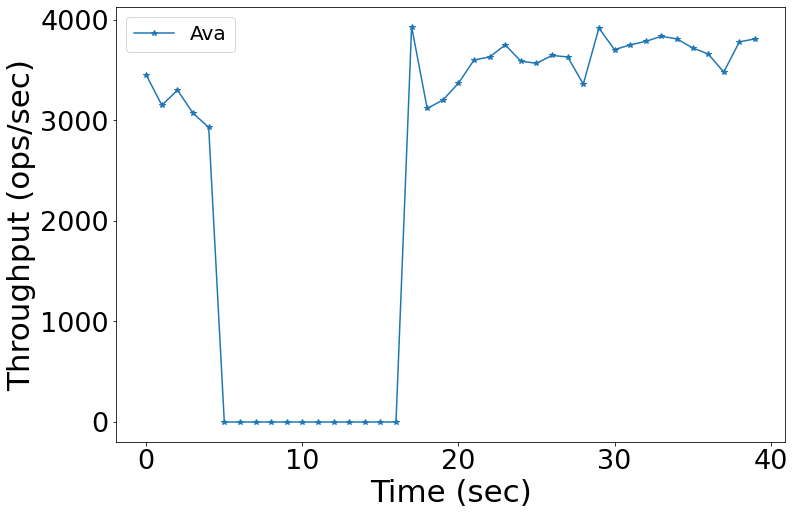

<Figure size 432x288 with 0 Axes>

In [14]:
fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'Ava')


pl.legend()
pl.xlabel('Time (sec)')
pl.ylabel('Throughput (ops/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
pl.savefig('/home/tejas/Desktop/LeaderFailure_HotStuffMC.pdf', dpi =150, bbox_inches = 'tight' )
pl.show()
pl.clf()

In [ ]:
pl.plot(lats)
pl.ylim(0,0.25)

In [ ]:
pl.plot(lats)
pl.ylim(0,0.6)

In [ ]:
np.average(s2[-75:-15])

In [ ]:
# os.system('grep -n -r "LatencyPlot: Received 1st MC message" ../../../dump_files/')

In [ ]:
# os.system('grep -n -r "LatencyPlot: before sending first mc message" ../../../dump_files/')

In [ ]:
# 1000*(32.676090-32.612236)

In [ ]:
# os.system('grep -n -r "LatencyPlot: going to execute based on 2nd MC message" ../../../dump_files/')


# os.system('grep -n -r "LatencyPlot: Finished execution" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Processing message from client" ../../../dump_files/')    

In [ ]:
# os.system('grep -n -r "LatencyPlot: before initial join message" ../../../dump_files/')    

In [ ]:
# # os.system('grep -n -r "LatencyPlot: " ../../../dump_files/')

# 1000*(11.479877-11.479442), 1000*(11.484887-11.479877),1000*(56.048590-56.046569), 1000*(56.050021 - 56.048590)

# # exec, # first mc, #second mc

# 1000*(56.050377 - 56.050181), 1000*(56.049389-56.049025), 1000*(56.050875-56.049389), 1000*(56.046557-56.038591) 


# # with open('opt1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('opt1.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)
  
    








# # with open('equiCluster1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('equiCluster1.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)
  
    
    
    
# # with open('equiCluster.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)

    
# # with open('lat.npy', 'rb') as f:
# #     lat1 = np.load(f)
# #     lat2 = np.load(f)

    
    
# # with open('opt.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')

# # pl.plot(eq1,eq2, '-*', label = 'optimized clusters: equal clusters (7 (R1),7 (R2)')
# # pl.plot(lat1,lat2, '-*', label = 'optimized clusters: latency (9 (R1),5 (R2))')
# # pl.plot(opt1,opt2, '-*', label = 'optimized clusters: latency and heterogeneity (4 (R1),5 (R1), 5 (R2))')
# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,350)
# # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

## Single Non-Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Single Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/NodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave

## Multiple Non Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==7:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==11:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.axvline(x=60, ls='--', color = 'green')
pl.axvline(x=80, ls='--', color = 'blue')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Multiple Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave